In [ ]:

!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ultralytics import YOLO


In [ ]:
# Download COCO val
#import torch
#torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
#!unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip

In [ ]:
# Validate YOLOv8n on COCO128 val
#!yolo val model=yolov8n.pt data=coco128.yaml

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GROCERYyolov8.zip to GROCERYyolov8.zip


In [ ]:
!unzip GROCERYyolov8.zip

Archive:  GROCERYyolov8.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/C1_P02_N1_S3_1_JPG.rf.7e792e0bd58a4cf3fcedf3ab3649bebf.jpg  
 extracting: test/images/C1_P02_N1_S5_1_JPG.rf.093447a725a3207c05778c15de3836a3.jpg  
 extracting: test/images/C1_P05_N4_S3_1_JPG.rf.2df9e095f5137ca7950fa9431c7aa0e9.jpg  
 extracting: test/images/C1_P06_N1_S5_1_JPG.rf.10880e1c71d9548b9228801c8c585b39.jpg  
 extracting: test/images/C1_P08_N2_S5_1_JPG.rf.369441b71770dace362d7ec6a3ee7f9f.jpg  
 extracting: test/images/C1_P08_N4_S3_1_JPG.rf.f10e0b7f860b24e7c052fd5a614fe2b1.jpg  
 extracting: test/images/C1_P09_N3_S4_1_JPG.rf.e57cb771d718d7597f21b76ab4de56bd.jpg  
 extracting: test/images/C1_P09_N3_S4_2_JPG.rf.8d0efc17b314f05963e2167c16a396a2.jpg  
 extracting: test/images/C1_P10_N1_S5_1_JPG.rf.9fa13e86d7a3010b2239160f2c70c74e.jpg  
 extracting: test/images/C2_P01_N1_S2_1

In [ ]:
!unzip GROCERY STORE.v1i.yolov8 (1).zip

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gAxS216tAR9o0WkbkGAt")
project = rf.workspace("cse299").project("fruit-and-vegetable")
dataset = project.version(1).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.105, to fix: `pip install ultralytics<=8.0.20`

Extracting Dataset Version Zip to Fruit-and-Vegetable-1 in yolov8:: 100%|██████████| 4990/4990 [00:02<00:00, 2245.22it/s]


In [ ]:
# Train YOLOv8n on COCO128 for 3 epochs
!yolo train model=yolov8n.pt data=/content/data.yaml epochs=3 imgsz=640

Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspace=4, nms=False, lr

In [ ]:
model = YOLO("yolov8m.pt")


In [ ]:
results = model.predict("/content/orange.png")


image 1/1 /content/orange.png: 640x640 3 oranges, 9008.9ms
Speed: 35.4ms preprocess, 9008.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
result = results[0]

In [ ]:
len(result.boxes)

3

In [ ]:
box = result.boxes[0]

In [ ]:
print("Object type:", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf)

Object type: tensor([49.])
Coordinates: tensor([[ 11.0594,  62.4593, 117.4828, 161.4110]])
Probability: tensor([0.8955])


In [ ]:
print("Object type:",box.cls[0])
print("Coordinates:",box.xyxy[0])
print("Probability:",box.conf[0])

Object type: tensor(49.)
Coordinates: tensor([ 11.0594,  62.4593, 117.4828, 161.4110])
Probability: tensor(0.8955)


In [ ]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 49.0
Coordinates: [11.059417724609375, 62.45927810668945, 117.48283386230469, 161.4110107421875]
Probability: 0.8955488801002502


In [ ]:
print(result.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [ ]:
cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: orange
Coordinates: [11, 62, 117, 161]
Probability: 0.9


In [ ]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: orange
Coordinates: [11, 62, 117, 161]
Probability: 0.9
---
Object type: orange
Coordinates: [61, 34, 144, 110]
Probability: 0.78
---
Object type: orange
Coordinates: [10, 34, 144, 161]
Probability: 0.3
---


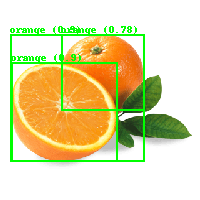

In [ ]:
from PIL import Image, ImageDraw

image_path = "/content/orange.png" 
image = Image.open(image_path)

draw = ImageDraw.Draw(image)

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)

    x1, y1, x2, y2 = cords
    
    draw.rectangle([(x1, y1), (x2, y2)], outline=(0, 255, 0), width=2)
    draw.text((x1, y1 - 10), f"{class_id} ({conf})", fill=(0, 255, 0))

image.show()


Enter the item you are looking for: apple
No, that item is not there in the image.


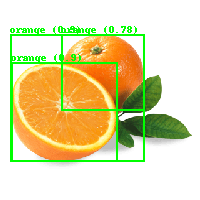

In [ ]:
from PIL import Image, ImageDraw

image_path = "/content/orange.png"
image = Image.open(image_path)

draw = ImageDraw.Draw(image)

item_to_search = input("Enter the item you are looking for: ")

found = False

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)

    x1, y1, x2, y2 = cords

    if class_id == item_to_search:
        draw.rectangle([(x1, y1), (x2, y2)], outline=(0, 255, 0), width=2)
        draw.text((x1, y1 - 10), f"{class_id} ({conf})", fill=(0, 255, 0))
        found = True

if not found:
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]
        cords = box.xyxy[0].tolist()
        cords = [round(x) for x in cords]
        conf = round(box.conf[0].item(), 2)

        x1, y1, x2, y2 = cords

        draw.rectangle([(x1, y1), (x2, y2)], outline=(0, 255, 0), width=2)
        draw.text((x1, y1 - 10), f"{class_id} ({conf})", fill=(0, 255, 0))

if found:
    print("Yes! The item is present in the image.")
else:
    print("No, that item is not there in the image.")


image.show()

